# Transformers

1. The first breakthrough for transformers was made in 2017 when google reserchers published a paper titled: **Attention is all you need**, you can get the paper [ here](https://arxiv.org/pdf/1706.03762.pdf)

2. Implementation of the architecture can also be gotten [here](https://nlp.seas.harvard.edu/2018/04/03/attention.html)

3. Understanding transformer principles to the basic level can be found [here](https://jalammar.github.io/illustrated-transformer/)

4. Tutorial on how to use transformers can be found [here](https://huggingface.co/course/chapter1/1)

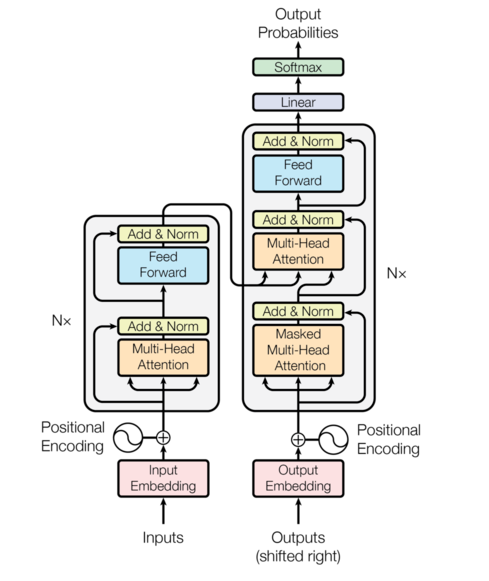

# Huggingface Transformers

Huggingface has alot of models and dataset. The models available allow for many different configurations and a great versatility in use-cases. The simple ones are presented here, showcasing usage for tasks such as question answering, sequence classification, named entity recognition and others.

###Summarization

Summarization is the task of summarizing a document or an article into a shorter text. If you would like to fine-tune a model on a summarization task, you may leverage the run_summarization.py script.

An example of a summarization dataset is the CNN / Daily Mail dataset, which consists of long news articles and was created for the task of summarization. If you would like to fine-tune a model on a summarization task, various approaches are described in this document.

Here is an example of using the pipelines to do summarization. It leverages a Bart model that was fine-tuned on the CNN / Daily Mail data set.

In [4]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 8.0 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
     |████████████████████████████████| 3.3 MB 48.6 MB/s 
     |████████████████████████████████| 596 kB 53.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


The easiest way to use a pretrained model on a given task is to use pipeline().

In [5]:
from transformers import pipeline

In [6]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [7]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [9]:
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


Below is an example of doing summarization using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder model, such as Bart or T5.
2. Define the article that should be summarized.
3. Add the T5 specific prefix “summarize: “.
4. Use the PreTrainedModel.generate() method to generate the summary.

In this example we use Google’s T5 model. Even though it was pre-trained only on a multi-task mixed dataset (including CNN / Daily Mail), it yields very good results.

In [10]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [11]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [12]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [15]:
# As you can see below, T5 uses a max_length of 512 so we cut the article to 512 tokens.
tokenizer

PreTrainedTokenizerFast(name_or_path='t5-base', vocab_size=32100, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<extra_id_43>', '<extra_id_44>', '<extra_id_45

In [16]:
inputs = tokenizer("summarize: " + ARTICLE, return_tensors="pt", max_length=512, truncation=True)

In [18]:
outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True
)

In [19]:
print(tokenizer.decode(outputs[0]))

<pad> prosecutors say the marriages were part of an immigration scam. if convicted, barrientos faces two criminal counts of "offering a false instrument for filing in the first degree" she has been married 10 times, nine of them between 1999 and 2002.</s>


##Preprocessing Data


The main tool for preprocessing data is what we call a tokenizer. You can build one using the tokenizer class associated to the model you would like to use, or directly with the AutoTokenizer class.

In [20]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [21]:
encoded_input = tokenizer("Hello, I'm a single sentence!")
print(encoded_input)

{'input_ids': [101, 8667, 117, 146, 112, 182, 170, 1423, 5650, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The input_ids are the indices corresponding to each token in our sentences.

In [23]:
tokenizer.decode(encoded_input['input_ids'])

"[CLS] Hello, I'm a single sentence! [SEP]"

If you have several sentences you want to process, you can do this efficiently by sending them as a list to the tokenizer:

In [24]:
batch_sentences = ["Hello I'm a single sentence",
                   "And another sentence",
                   "And the very very last one"]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)

{'input_ids': [[101, 8667, 146, 112, 182, 170, 1423, 5650, 102], [101, 1262, 1330, 5650, 102], [101, 1262, 1103, 1304, 1304, 1314, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


If the purpose of sending several sentences at a time to the tokenizer is to build a batch to feed the model, we will probably want:

1. To pad each sentence to the maximum length there is in your batch.
2. To truncate each sentence to the maximum length the model can accept (if applicable).
3. To return tensors.

We can do all of this by using the following options when feeding your list of sentences to the tokenizer:

In [25]:
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(batch)

{'input_ids': tensor([[ 101, 8667,  146,  112,  182,  170, 1423, 5650,  102],
        [ 101, 1262, 1330, 5650,  102,    0,    0,    0,    0],
        [ 101, 1262, 1103, 1304, 1304, 1314, 1141,  102,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0]])}


We can now see what the attention_mask is all about: it points out which tokens the model should pay attention to and which ones it should not (because they represent padding in this case).


Note that if your model does not have a maximum length associated to it, the command above will throw a warning. You can safely ignore it. You can also pass verbose=False to stop the tokenizer from throwing those kinds of warnings.

## Fine-tuning a pretrained model

Before finetuning, we have to prepare our dataset.

In [ ]:
!pip install datasets

In [15]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [17]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [18]:
#model = AutoModelForSeq2SeqLM.from_pretrained("bert-base-cased")

Prepraring text for model input

In [19]:
#This works for a single or multiple inputs, but when we want to tokenize for the dataser gotten from dataloader the we have to write a function and use a map function to tokenize it


#inputs = tokenizer(sentences, padding="max_length", truncation=True)

In [20]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [21]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000)) 
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000)) 
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

Since PyTorch does not provide a training loop, the 🤗 Transformers library provides a Trainer API that is optimized for 🤗 Transformers models, with a wide range of training options and with built-in features like logging, gradient accumulation, and mixed precision.

In [22]:
tokenized_datasets['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 25000
})

In [23]:
small_eval_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1000
})

Fine-tuning in PyTorch with the Trainer API

In [24]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [25]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")

In [26]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset
)

In [27]:
trainer.train()

***** Running training *****
  Num examples = 1000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 375


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=375, training_loss=0.30250651041666665, metrics={'train_runtime': 306.1802, 'train_samples_per_second': 9.798, 'train_steps_per_second': 1.225, 'total_flos': 789333166080000.0, 'train_loss': 0.30250651041666665, 'epoch': 3.0})

In [28]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8


{'eval_accuracy': 0.872,
 'eval_loss': 0.5897601246833801,
 'eval_runtime': 36.3299,
 'eval_samples_per_second': 27.526,
 'eval_steps_per_second': 3.441}

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", evaluation_strategy="epoch")